A partir des données de ce dataset nous voulons étudier la corrélation entre les différents paramètres et l'amplitude des séismes et nous voulons prédire l'amplitude d'un séisme en fonction de paramètres donnés

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('earthquakes.csv')
data.shape

(23412, 21)

In [2]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
"""
Check column 100% NaN
"""
dropped_nan_col = []
for (columnName, columnData) in data.iteritems(): 
    if(data[columnName].isna().all() == True):
        dropped_nan_col.append(columnName)
print("{} feature have 100% NaN ".format(len(dropped_nan_col)))

0 feature have 100% NaN 


In [4]:
"""
Delete column more than 25% NaN
"""
def deal_nanp(df:pd.DataFrame, thresold: float):
    bf=[]
    for c in data.columns.to_list():
        if data[c].isna().sum()/data.shape[0] > thresold:
            bf.append(c)
    print("{} feature have more than {} NaN ".format(len(bf),thresold))
    print('\n\n - - - features - - -  \n {}'.format(bf))
    return bf
data = data.drop(deal_nanp(data, 0.25), axis=1)
data

8 feature have more than 0.25 NaN 


 - - - features - - -  
 ['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square']


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed


In [5]:
"""
drop specific column
"""
def drop_specific_col():
    dropped_sepcific_col = []
    dropped_sepcific_col.append('ID')
    dropped_sepcific_col.append('Location Source')
    dropped_sepcific_col.append('Magnitude Source')
    dropped_sepcific_col.append('Magnitude Type')
    return dropped_sepcific_col

data = data.drop(drop_specific_col(), axis=1)
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,US,Reviewed


In [6]:
data.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
Type          object
Depth        float64
Magnitude    float64
Source        object
Status        object
dtype: object

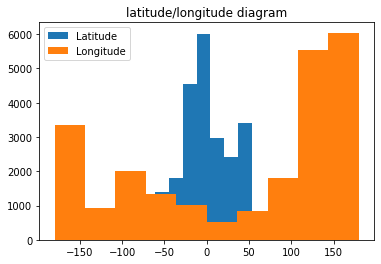

In [21]:
plt.hist(data["Latitude"], label='Latitude')
plt.hist(data["Longitude"], label='Longitude')
plt.title('latitude/longitude diagram')
plt.legend()
plt.show()

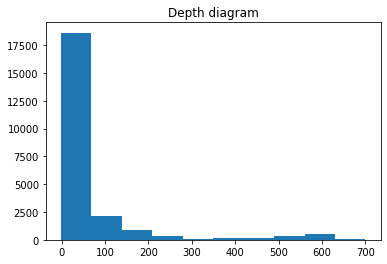

In [25]:
plt.hist(data["Depth"])
plt.title('Depth diagram')
plt.show()

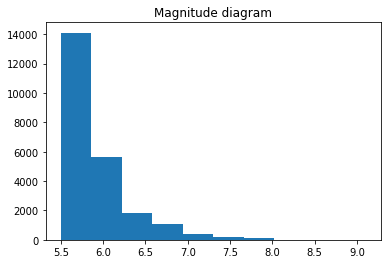

In [26]:
plt.hist(data["Magnitude"])
plt.title('Magnitude diagram')
plt.show()

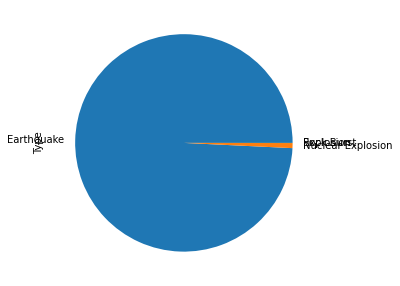

1
2
3


In [54]:
data["Type"].value_counts().plot(kind='pie', figsize=(5,5))
plt.show()
data["Type"].value_counts(normalize=True)
count = 0
for i in data["Type"].value_counts(normalize=True):
    if(i < 0.3):
        print(count)
    count = count + 1

#import itertools
#newdic = []
#for key, group in itertools.groupby(data["Type"].value_counts(normalize=True), lambda k: 'Other' if (k<0.3) else k):
     #newdic[key] = sum([k for k in list(group)])


In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['Type'])
le.classes_
data['Type'] = le.transform(data['Type'])

le.fit(data['Source'])
data['Source'] = le.transform(data['Source'])

le.fit(data['Status'])
data['Status'] = le.transform(data['Status'])
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,0,131.60,6.0,4,0
1,01/04/1965,11:29:49,1.8630,127.3520,0,80.00,5.8,4,0
2,01/05/1965,18:05:58,-20.5790,-173.9720,0,20.00,6.2,4,0
3,01/08/1965,18:49:43,-59.0760,-23.5570,0,15.00,5.8,4,0
4,01/09/1965,13:32:50,11.9380,126.4270,0,15.00,5.8,4,0
...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,0,12.30,5.6,7,1
23408,12/28/2016,09:13:47,38.3777,-118.8957,0,8.80,5.5,7,1
23409,12/28/2016,12:38:51,36.9179,140.4262,0,10.00,5.9,11,1
23410,12/29/2016,22:30:19,-9.0283,118.6639,0,79.00,6.3,11,1
